In [4]:
from selenium import webdriver
from shutil import which
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.chrome.options import Options
from selenium.common.exceptions import NoSuchElementException, ElementClickInterceptedException, ElementNotInteractableException
import pandas as pd
import time
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup
import requests


def fetch_jobs(keyword,location, num_pages):
    options = Options()
    options.add_argument("window-size=1920,1080")
    #Enter your chromedriver.exe path below
    chrome_path = "/home/ajay/chromedriver_linux64/chromedriver"
    driver = webdriver.Chrome(executable_path=chrome_path, options=options)
#     driver.get("https://www.glassdoor.co.in/Job/Home/recentActivity.htm")
#     search_input = driver.find_element(By.ID,"sc.keyword")
#     search_input.send_keys(keyword)
#     search_input.send_keys(Keys.ENTER)
#     #time.sleep(5)
#     search_input = driver.find_element(By.ID,"sc.location")
#     search_input.click()  # click on the input element to give it focus
#     search_input.send_keys(Keys.HOME)  # move cursor to beginning of input
#     for i in range(len(search_input.get_attribute("value"))):
#         search_input.send_keys(Keys.DELETE)  # delete existing value
#     #driver.execute_script("arguments[0].value = '';", search_input)
#     search_input.send_keys(location)
#     search_input.send_keys(Keys.ENTER)
#     time.sleep(2)
    
    driver.get("https://www.glassdoor.co.in/Job")
    search_input = driver.find_element(By.ID,"sc.keyword")
    search_input.send_keys(keyword)
    #search_input.send_keys(Keys.ENTER)
    #time.sleep(5)
    search_input = driver.find_element(By.ID,"sc.location")
    #search_input.click()  # click on the input element to give it focus
    #search_input.send_keys(Keys.HOME)  # move cursor to beginning of input
    #for i in range(len(search_input.get_attribute("value"))):
        #search_input.send_keys(Keys.DELETE)  # delete existing value
    #driver.execute_script("arguments[0].value = '';", search_input)
    search_input.send_keys(location)
    search_input.send_keys(Keys.ENTER)
    time.sleep(2)
    
    

    

    
    
    
    
    
    
    
    company_name = []
    job_title = []
    salary_est = []
    location = []
    job_description = []
    salary_estimate = []
    company_size = []
    company_type = []
    company_sector = []
    company_industry = []
    company_founded = []
    company_revenue = []
    company_link=[]
    
    
    
    #Set current page to 1
    current_page = 1     
        
        
    time.sleep(3)
    
    while current_page <= num_pages:   
        #temp=[]
        
        done = False
        while not done:
            job_cards = driver.find_elements(By.XPATH,"//article[@id='MainCol']//ul/li[@data-adv-type='GENERAL']")
            for card in job_cards:
                card.click()
                time.sleep(1)

                #Closes the signup prompt
                try:
                    driver.find_element(By.XPATH,".//span[@class='SVGInline modal_closeIcon']").click()
                    time.sleep(2)
                except NoSuchElementException:
                    time.sleep(2)
                    pass

                #Expands the Description section by clicking on Show More
                try:
                    driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()
                    #css-t3xrds e856ufb4
                    time.sleep(1)
                except NoSuchElementException:
                    card.click()
                    print(str(current_page) + '#ERROR: no such element')
                    time.sleep(30)
                    driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()
                except ElementNotInteractableException:
                    card.click()
                    driver.implicitly_wait(30)
                    print(str(current_page) + '#ERROR: not interactable')
                    driver.find_element(By.XPATH,"//div[@class='css-t3xrds e856ufb4']").click()

                #Scrape 

                try:
                    company_name.append(driver.find_element(By.XPATH,"//div[@class='css-87uc0g e1tk4kwz1']").text)
                    #css-87uc0g e1tk4kwz1
                except:
                    company_name.append("#N/A")
                    pass

                try:
                    job_title.append(driver.find_element(By.XPATH,"//div[@class='css-1vg6q84 e1tk4kwz4']").text)
                except:
                    job_title.append("#N/A")
                    pass
                #jobLink css-1rd3saf eigr9kq2
                
                #link_element = driver.find_element_by_class_name("gd-ui-button")


#                 try:
#                     #job_title.append(driver.find_element(By.CLASS_NAME,"//div[@class='css-1vg6q84 e1tk4kwz4']").text)
#                     elements = driver.find_elements(By.CLASS_NAME,"jobLink css-1rd3saf eigr9kq2")
#                     #print(link_element)
#                     for element in elements:
#                         href = element.get_attribute("href")
#                     company_link.append(href)    
#                     link_href = link_element.get_attribute("href")
#         for element in elements:
#     href = element.get_attribute("href")
#                     company_link.append(link_href)
#                 except:
#                     company_link.append("#N/A")
#                     pass

                try:
                    location.append(driver.find_element(By.XPATH,"//div[@class='css-56kyx5 e1tk4kwz5']").text)
                except:
                    location.append("#N/A")
                    pass

                try:
                    job_description.append(driver.find_element(By.XPATH,"//div[@id='JobDescriptionContainer']").text)
                except:
                    job_description.append("#N/A")
                    pass

                try:
                    salary_estimate.append(driver.find_element(By.XPATH,"//div[@class='css-1bluz6i e2u4hf13']").text)
                    #driver.find_element(By.CSS_SELECTOR, "span[data-test='detailSalary']")
                    #salary_element = driver.find_element_by_class_name("css-1xe2xww")
                except:
                    salary_estimate.append("#N/A")
                    pass
                
                try:
                    company_size.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Size']//following-sibling::*").text)
                except:
                    company_size.append("#N/A")
                    pass
                
                try:
                    company_type.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Type']//following-sibling::*").text)
                except:
                    company_type.append("#N/A")
                    pass
                    
                try:
                    company_sector.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Sector']//following-sibling::*").text)
                except:
                    company_sector.append("#N/A")
                    pass
                    
                try:
                    company_industry.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Industry']//following-sibling::*").text)
                except:
                    company_industry.append("#N/A")
                    pass
                    
                try:
                    company_founded.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Founded']//following-sibling::*").text)
                except:
                    company_founded.append("#N/A")
                    pass
                    
                try:
                    company_revenue.append(driver.find_element(By.XPATH,"//div[@id='CompanyContainer']//span[text()='Revenue']//following-sibling::*").text)
                except:
                    company_revenue.append("#N/A")
                    pass
                    
                    
                    
                    
                done = True
#         elements = driver.find_elements(By.CLASS_NAME,"jobLink css-1rd3saf eigr9kq2")
#         for element in elements:
#             href = element.get_attribute("href")
#             if href is not None:
#                 company_link.append(href)  
#             else:
#                 company_link.append("#N/A")
#         print(company_link)        
                
       # Moves to the next page        
        html=driver.page_source
        soup = BeautifulSoup(html, 'html.parser')
        a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})
        for a_tag in a_tags:
            company_link.append("glassdoor.co.in"+a_tag['href'])
        
        if done:
            print(str(current_page) + ' ' + 'out of' +' '+ str(num_pages) + ' ' + 'pages done')
            driver.find_element(By.XPATH,"//span[@alt='next-icon']").click()   
            current_page = current_page + 1
            time.sleep(4)
            




    driver.close()
    df = pd.DataFrame({'company': company_name, 
    'job title': job_title,
    'company_link':company_link,
    'location': location,
    'job description': job_description,
    'salary estimate': salary_estimate,
    'company_size': company_size,
    'company_type': company_type,
    'company_sector': company_sector,
    'company_industry' : company_industry, 'company_founded' : company_founded, 'company_revenue': company_revenue})
    df = df.iloc[:, :-6]
    df=df.dropna()
    
    
    df.to_csv(keyword +  '.csv',index=False)

In [5]:
#temp=[]

In [7]:
fetch_jobs("ML Engineer","India",2)

/tmp/ipykernel_34229/596782143.py:20: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome(executable_path=chrome_path, options=options)


1 out of 2 pages done
2 out of 2 pages done


In [8]:
#temp=[]

In [9]:
temp

NameError: name 'temp' is not defined

'<html xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/" style="height: 100%;" lang="en"><head><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardres
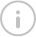

In [76]:
temp[0]

In [77]:
from bs4 import BeautifulSoup
import requests

In [78]:
soup = BeautifulSoup(temp[0], 'html.parser')

<html lang="en" style="height: 100%;" xmlns:fb="http://www.facebook.com/2008/fbml" xmlns:og="http://opengraph.org/schema/"><head><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardresearch.com/beacon.js"></script><script async="" src="https://sb.scorecardrese
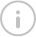

In [79]:
soup

In [1]:
a_tags = soup.find_all('a', {'class': 'jobLink css-1rd3saf eigr9kq2'})

# extract the href links from the anchor tags
href_links = ["glassdoor.co.in"+ a_tag['href'] for a_tag in a_tags]

print(href_links)

NameError: name 'soup' is not defined

In [81]:
for i in href_links:
    print(i)

glassdoor.co.in/partner/jobListing.htm?pos=101&ao=1110586&s=58&guid=00000187be8a23f197ac91aa4097feab&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_41c3653b&cb=1682528937331&jobListingId=1008611135091&cpc=878687325D2A5CC7&jrtk=3-0-1guv8k90ip2lu801-1guv8k91ckhq2800-20374a8950ae0cae--6NYlbfkN0Dxx2_3vF0dOEaA0RCCm5Ur93WH6DqkFN5qptQjqPOhaPIYLFDuaR_GLTeTXNcIXKGxWzgMI7BI47FJKrl_-1SEM2XFjR1bdIusBiSGi0R-xAu5-WPXt1xDAjnLHWrh6aI5whrSwI4nMPYWkzsPq7Em68bSVEZWyjmYgnx6t9urMs9tbdUMptWgFvf-XlwO3GWgIMLqgzyDY-nQgB6zrgxm3ljVtLdHNeEa0VJr4TJwuqWR9BzZjSpXdO86umeWpYeI7mFQALoggQ84L2juxHW1gvI6_A7j8xtZJ65vqI7EFTfR7tmDPadZQkjMqrvdd03fF7xRhW5VbPL8AJwB3mLKyym_kNMvm65_fPuccr6xjvDE88lb82GZL-A4Cr28OSYmEnAcxF1lwpmrG5yS9ZV3QsTsYV8hB00-3DZ3mCGa5sXH8oy_eKZIBal1sZOiuTO9ne4BiIgT4cxBi9nDcp0q42XdTLF97b7Uew9DLfD24aApLf7_sLM5zbcjEExQOo2nNqG8vMWmfeFK2gzK6ErkRX3Ro3-oKARFTvMcQ2J_OmYKxAwTKlf1czFv1ob5ZR3w0o_6-Mwvrg%3D%3D
glassdoor.co.in/partner/jobListing.htm?pos=102&ao=1110586&s=58&guid=00000187be8a23f197ac91aa4097feab&src=GD_JOB_AD&t=SR&vt=w&c

In [83]:
href_links[14]

'glassdoor.co.in/partner/jobListing.htm?pos=115&ao=1136043&s=58&guid=00000187be8a23f197ac91aa4097feab&src=GD_JOB_AD&t=SR&vt=w&ea=1&cs=1_d45965e0&cb=1682528937333&jobListingId=1008601708540&jrtk=3-0-1guv8k90ip2lu801-1guv8k91ckhq2800-1000fed1db44b01b-'

In [37]:
for i in href_links:
    print(i)

In [ ]:
soup = BeautifulSoup(html_content, 'html.parser')
a_element = soup.find('a', {'class': 'gd-ui-button mr-0 fillMob d-flex align-items-center justify-content-center css-420qat evpplnh1'})
link = a_element['href']
print('http://glassdoor.co.in'+link)